# Задача бинарной классификации

**Bank Marketing Data Set : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing**

- The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
- The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).





In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
data = pd.read_csv('bank-additional-full.csv', sep = ';', engine = 'python')

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
print(data)

       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  

In [7]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


 ## Input variables:
### bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
### related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone') 
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
### social and economic context attributes:
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric) 
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

## Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes','no')


In [9]:
print(data.shape)
print(data.columns)

(41188, 21)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [10]:
data.index

RangeIndex(start=0, stop=41188, step=1)

In [11]:
data.at[2, 'job']

'services'

In [12]:
data['job']

0          housemaid
1           services
2           services
3             admin.
4           services
            ...     
41183        retired
41184    blue-collar
41185        retired
41186     technician
41187        retired
Name: job, Length: 41188, dtype: object

In [13]:
data['job'][3]

'admin.'

In [14]:
data['job'].dtype.name

'object'

In [15]:
type(data['job'][3])

str

In [16]:
type(data['job'])

pandas.core.series.Series

In [17]:
data[['job', 'education']].head()

,job,education
0,housemaid,basic.4y
1,services,high.school
2,services,high.school
3,admin.,basic.6y
4,services,high.school


In [18]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


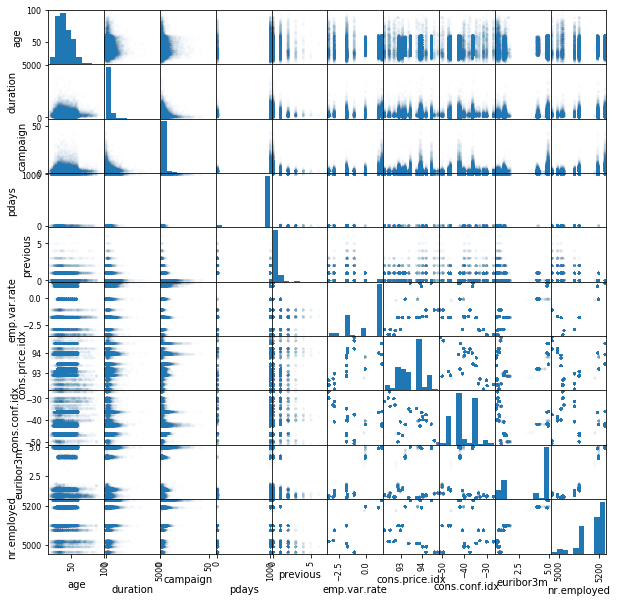

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

In [18]:
data.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


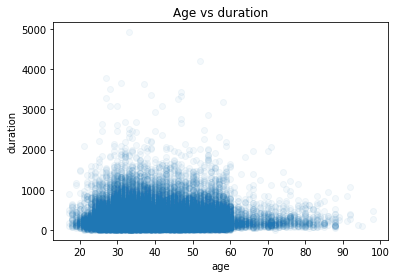

In [19]:
plt.plot(data['age'], data['duration'], 'o', alpha = 0.05)
plt.xlabel('age')
plt.ylabel('duration')
plt.title('Age vs duration')
pass

In [20]:
data['y'] == 'yes'

0        False
1        False
2        False
3        False
4        False
         ...  
41183     True
41184    False
41185    False
41186     True
41187    False
Name: y, Length: 41188, dtype: bool

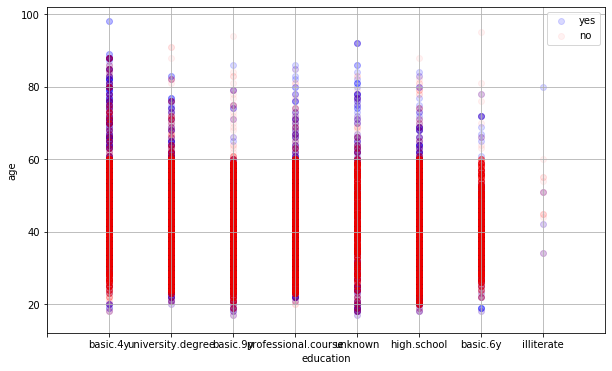

In [31]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['y'] == 'yes']['education'],
            data[data['y'] == 'yes']['age'],
            alpha = 0.15,
            label = 'yes',
            color = 'b')

plt.scatter(data[data['y'] == 'no']['education'],
            data[data['y'] == 'no']['age'],
            alpha = 0.05,
            label = 'no',
            color = 'r')

plt.xlabel('education')
plt.xticks(range(-1,8))
plt.xlim(-1, 8)
plt.ylabel('age')
plt.legend()
plt.grid()

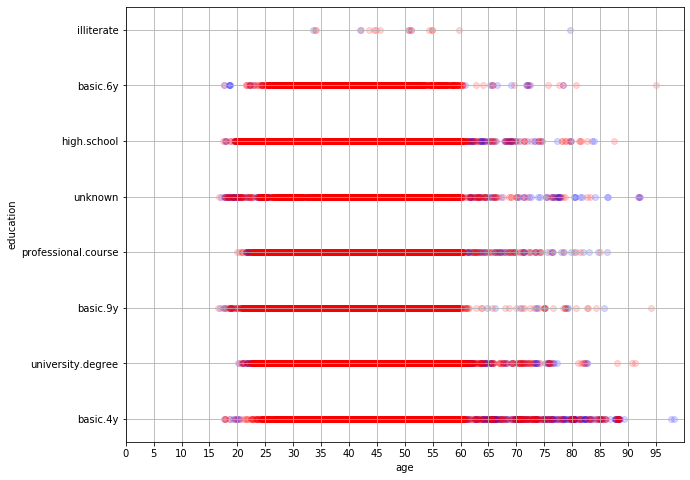

In [28]:
np.random.seed(0)
age_rnd = data['age'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(age_rnd[data['y'] == 'yes'],
            data[data['y'] == 'yes']['education'],
            alpha = 0.15,
            label = 'eys',
            color = 'b')

plt.scatter(age_rnd[data['y'] == 'no'],
            data[data['y'] == 'no']['education'],
            alpha = 0.15,
            label = 'no',
            color = 'r')

plt.xlabel('age')
plt.xticks(range(0,100,5))
plt.xlim(0, 100)
plt.ylabel('education')
plt.grid()

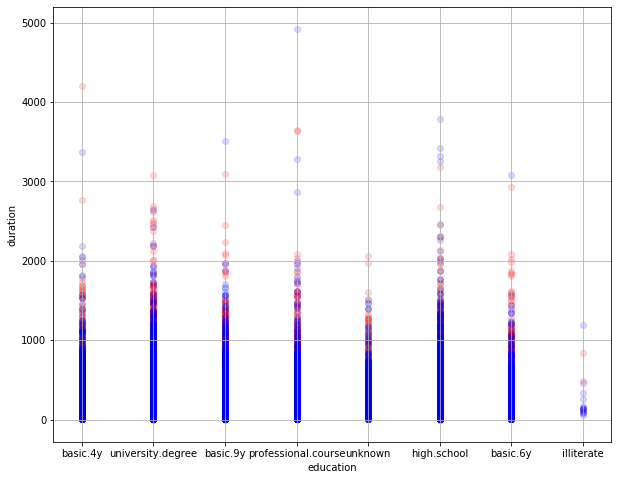

In [33]:
plt.figure(figsize = (10, 8))

plt.scatter(data[data['y'] == 'yes']['education'],
            data[data['y'] == 'yes']['duration'],
            alpha = 0.15,
            label = 'yes',
            color = 'r')

plt.scatter(data[data['y'] == 'no']['education'],
            data[data['y'] == 'no']['duration'],
            alpha = 0.15,
            label = 'no',
            color = 'b')

plt.xlabel('education')
plt.ylabel('duration')
plt.grid()

In [34]:
data.describe(include = ['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [35]:
data.describe(include = 'all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [36]:
data['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [37]:
data['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [38]:
for name in data['education'].unique():
    print(name, data['education'][data['education'] == name].iloc[0])

basic.4y basic.4y
high.school high.school
basic.6y basic.6y
basic.9y basic.9y
professional.course professional.course
unknown unknown
university.degree university.degree
illiterate illiterate


In [41]:
data['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

## Задача

Attribute `duration` highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [21]:
data = data.drop('duration', axis = 1)

In [22]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Готовим данные

In [23]:
data['education'].dtype.name

'object'

In [24]:
data['age'].dtype.name

'int64'

In [25]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [26]:
for c in categorical_columns:
    print(c, data[c].unique())

job ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital ['married' 'single' 'divorced' 'unknown']
education ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default ['no' 'unknown' 'yes']
housing ['no' 'yes' 'unknown']
loan ['no' 'yes' 'unknown']
contact ['telephone' 'cellular']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome ['nonexistent' 'failure' 'success']
y ['no' 'yes']


In [27]:
for c in numerical_columns:
    print(c, data[c].unique())

age [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
campaign [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
pdays [999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
previous [0 1 2 3 4 5 6 7]
emp.var.rate [ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
cons.price.idx [93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.767]
cons.conf.idx [-36.4 -41.8 -42.7 -36.1 -40.4 -42.  -45.9 -50.  -47.1 -46.2 -40.8 -33.6
 -31.4 -29.8 -26.9 -30.1 -33.  -34.8 -34.6 -40.  -39.8 -40.3 -38.3 -37.5
 -49.5 -50.8]
euribor3m [4.857 4.856 4.855 4.859 

In [28]:
data.median(axis = 0)

age                 38.000
campaign             2.000
pdays              999.000
previous             0.000
emp.var.rate         1.100
cons.price.idx      93.749
cons.conf.idx      -41.800
euribor3m            4.857
nr.employed       5191.000
dtype: float64

## Обрабатываем пропущенные значения

Заменим пропущенные значения для категориальных признаков самым популярным значением в столбце.

In [29]:
data['education'].describe()

count                 41188
unique                    8
top       university.degree
freq                  12168
Name: education, dtype: object

In [30]:
type(data['education'].describe())

pandas.core.series.Series

In [31]:
data['education'].describe().top

'university.degree'

In [32]:
data_describe = data.describe(include = [object])

In [33]:
for c in categorical_columns:
        data[c] = data[c].replace('unknown', data_describe[c]['top'])

In [34]:
data.describe(include = [object])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10752,25008,13899,41185,22566,34940,26144,13769,8623,35563,36548


In [35]:
for c in categorical_columns:
    print(c, data[c].unique())

job ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']
marital ['married' 'single' 'divorced']
education ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']
default ['no' 'yes']
housing ['no' 'yes']
loan ['no' 'yes']
contact ['telephone' 'cellular']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome ['nonexistent' 'failure' 'success']
y ['no' 'yes']


## Векторизация

Заменим значения бинарных категориальных признаков на числовые.

In [36]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['contact', 'y'] ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'day_of_week', 'poutcome']


In [37]:
data['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [38]:
data['y'].unique()

array(['no', 'yes'], dtype=object)

In [39]:
for c in binary_columns:
    data_binary_unique = data[c].unique()
    data[c] = data[c].replace(data_binary_unique[0], 0)
    data[c] = data[c].replace(data_binary_unique[1], 1)

In [40]:
for c in binary_columns:
    print(c, data[c].unique())

contact [0 1]
y [0 1]


К небинарными признакам применим метод _векторизации_, 
который заключается в следующем.

Признак `j`, принимающий `s` значений, заменим на `s` признаков, принимащих значения `0` или `1`,
в зависимости от того, чему равно значение исходного признака `j`.

In [41]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')


## Нормализация количественных признаков

Каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [42]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [43]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [44]:
data_numerical.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04
mean,-1.009196e-16,-9.591671e-17,-2.842999e-16,6.624464e-17,-4.218210e-13,-8.643368e-11,-2.132652e-12,2.648957e-14,4.278840e-11
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.209338e+00,-5.659151e-01,-5.149381e+00,-3.494900e-01,-2.216407e+00,-2.374861e+00,-2.224926e+00,-1.722330e+00,-2.815662e+00
25%,-7.699710e-01,-5.659151e-01,1.954115e-01,-3.494900e-01,-1.197921e+00,-8.649442e-01,-4.747852e-01,-1.312978e+00,-9.402695e-01
50%,-1.942243e-01,-2.049060e-01,1.954115e-01,-3.494900e-01,6.480844e-01,2.994534e-01,-2.803250e-01,7.124512e-01,3.316759e-01
75%,6.693957e-01,1.561030e-01,1.954115e-01,-3.494900e-01,8.390505e-01,7.227137e-01,8.864358e-01,7.724127e-01,8.451598e-01
max,5.563242e+00,1.928958e+01,1.954115e-01,1.379475e+01,8.390505e-01,2.058143e+00,2.939071e+00,8.208431e-01,8.451598e-01


## Соединяем все в одну таблицу

In [45]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(41188, 56)


In [46]:
data

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,contact,y
0,1.533016,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.712451,0.331676,0,...,0,1,0,0,0,0,1,0,0,0
1,1.628973,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.712451,0.331676,0,...,0,1,0,0,0,0,1,0,0,0
2,-0.290182,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.712451,0.331676,0,...,0,1,0,0,0,0,1,0,0,0
3,-0.002309,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.712451,0.331676,1,...,0,1,0,0,0,0,1,0,0,0
4,1.533016,-0.565915,0.195412,-0.349490,0.648084,0.722714,0.886436,0.712451,0.331676,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164298,-0.565915,0.195412,-0.349490,-0.752333,2.058143,-2.224926,-1.495168,-2.815662,0,...,1,0,0,0,0,0,1,0,1,1
41184,0.573438,-0.565915,0.195412,-0.349490,-0.752333,2.058143,-2.224926,-1.495168,-2.815662,0,...,1,0,0,0,0,0,1,0,1,0
41185,1.533016,-0.204906,0.195412,-0.349490,-0.752333,2.058143,-2.224926,-1.495168,-2.815662,0,...,1,0,0,0,0,0,1,0,1,0
41186,0.381522,-0.565915,0.195412,-0.349490,-0.752333,2.058143,-2.224926,-1.495168,-2.815662,0,...,1,0,0,0,0,0,1,0,1,1


In [47]:
data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,contact,y
count,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,-1.009196e-16,-9.591671e-17,-2.842999e-16,6.624464e-17,-4.218210e-13,-8.643368e-11,-2.132652e-12,2.648957e-14,4.278840e-11,0.261047,...,0.190031,0.206711,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335,0.634748,0.112654
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.439211,...,0.392330,0.404951,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512,0.481507,0.316173
min,-2.209338e+00,-5.659151e-01,-5.149381e+00,-3.494900e-01,-2.216407e+00,-2.374861e+00,-2.224926e+00,-1.722330e+00,-2.815662e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.699710e-01,-5.659151e-01,1.954115e-01,-3.494900e-01,-1.197921e+00,-8.649442e-01,-4.747852e-01,-1.312978e+00,-9.402695e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,-1.942243e-01,-2.049060e-01,1.954115e-01,-3.494900e-01,6.480844e-01,2.994534e-01,-2.803250e-01,7.124512e-01,3.316759e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,6.693957e-01,1.561030e-01,1.954115e-01,-3.494900e-01,8.390505e-01,7.227137e-01,8.864358e-01,7.724127e-01,8.451598e-01,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,5.563242e+00,1.928958e+01,1.954115e-01,1.379475e+01,8.390505e-01,2.058143e+00,2.939071e+00,8.208431e-01,8.451598e-01,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# X и y

In [48]:
X = data.drop(('y'), axis = 1) # выбрасываем столбец 'y'
y = data['y']
feature_names = X.columns


In [49]:
type(feature_names)

pandas.core.indexes.base.Index

In [50]:
feature_names

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
      

In [51]:
print(X.shape)
print(y.shape)
N, d = X.shape

(41188, 55)
(41188,)


In [52]:
type(X)

pandas.core.frame.DataFrame

In [53]:
type(y)

pandas.core.series.Series

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

32950 8238


# $k$NN

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [53]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [54]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.09399089529590288 0.10572954600631221


In [55]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ

In [56]:
err_test

0.10572954600631224

In [57]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[7154  149]
 [ 722  213]]


Попробуем другую метрику

In [59]:
knn = KNeighborsClassifier(n_neighbors = 10, metric = 'manhattan')
print(knn)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')
0.09396054628224583 0.10585093469288662


In [60]:
knn = KNeighborsClassifier(n_neighbors = 10, metric = 'chebyshev')
print(knn)
knn.fit(X_train, y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')
0.09608497723823976 0.10718621024520515


Остановимся на метрике 'minkowski' с параметром p=2

### Подбор параметров

In [88]:
# Долго!
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.0988467374810319 35


In [89]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.09678300455235204 0.10390871570769604


# PCA

In [56]:
from sklearn.decomposition import PCA

In [71]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X_train)
principalComponents

array([[-1.61048362, -0.10156723,  0.30993301, ...,  0.18900184,
        -0.83082814, -0.09621812],
       [ 2.04599254, -1.73146586,  0.37566221, ..., -0.75638957,
         0.01207243, -1.171215  ],
       [ 2.72105446,  0.17272829, -0.72126616, ...,  0.84042422,
        -0.1233972 ,  0.17564111],
       ...,
       [ 5.11023777,  4.05223713, -0.08366594, ..., -1.65809833,
        -1.23674108, -0.10099248],
       [-1.33512234,  0.52791536, -0.41003952, ...,  0.51443253,
        -0.03112648, -0.7535904 ],
       [-1.41346964, -0.53781332,  1.28602216, ..., -0.19695807,
         1.04265697, -0.24175005]])

In [72]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents
            , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-1.610483,-0.101519
1,2.045993,-1.731465
2,2.721054,0.172729
3,-1.582928,-0.073201
4,-1.319645,0.374947
...,...,...
32945,-1.376307,1.099275
32946,-1.919131,0.288498
32947,5.110238,4.052239
32948,-1.335123,0.527929


In [73]:
np.array(y_train)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [74]:
finalDf = pd.concat([principalDf, pd.DataFrame(data = np.array(y_train)
             , columns = ['y'])], axis = 1)
finalDf

,principal component 1,principal component 2,y
0,-1.610483,-0.101519,0
1,2.045993,-1.731465,0
2,2.721054,0.172729,0
3,-1.582928,-0.073201,0
4,-1.319645,0.374947,0
...,...,...,...
32945,-1.376307,1.099275,0
32946,-1.919131,0.288498,0
32947,5.110238,4.052239,1
32948,-1.335123,0.527929,0


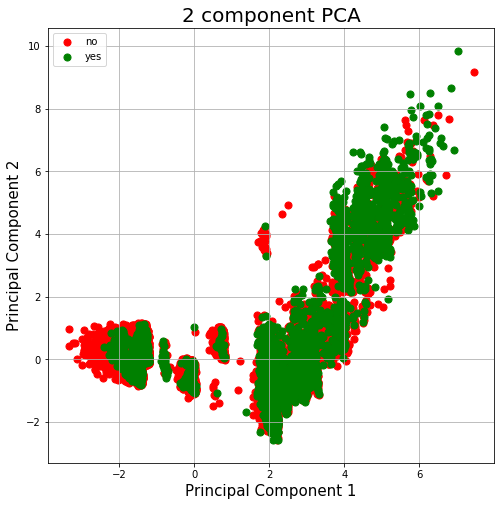

In [76]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['y'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['no', 'yes'])
ax.grid()

In [60]:
err_train_pca = []
err_test_pca = []
for n_comp in range(1,56):
    pca = PCA(n_components=n_comp)
    principalComponents_train = pca.fit_transform(X_train)
    principalComponents_test = pca.fit_transform(X_test)
    knn = KNeighborsClassifier(n_neighbors = 35)
    knn.fit(principalComponents_train, np.array(y_train))
    y_train_predict = knn.predict(principalComponents_train)
    y_test_predict = knn.predict(principalComponents_test)

    err_train = np.mean(y_train != y_train_predict)
    err_test  = np.mean(y_test  != y_test_predict)
    err_train_pca.append(err_train)
    err_test_pca.append(err_test)
    print(err_train, err_test)
print(err_train_pca)
print(err_test_pca)

0.10185128983308042 0.10949259529011895
0.0992412746585736 0.10281621752852634
0.0987556904400607 0.10342316096139839
0.09860394537177541 0.10487982520029134
0.09905918057663125 0.10487982520029134
0.0979969650986343 0.10548676863316339
0.09808801213960547 0.10524399126001456
0.09790591805766313 0.10572954600631221
0.09814871016691958 0.10475843651371693
0.09781487101669195 0.10342316096139839
0.09790591805766313 0.10439427045399369
0.0982701062215478 0.10439427045399369
0.09817905918057664 0.10415149308084487
0.09833080424886191 0.10390871570769604
0.09793626707132018 0.10354454964797281
0.09793626707132018 0.1045156591405681
0.09787556904400607 0.1045156591405681
0.09811836115326251 0.10403010439427045
0.09763277693474962 0.10403010439427045
0.09745068285280728 0.10403010439427045
0.09738998482549317 0.10390871570769604
0.09757207890743551 0.10439427045399369
0.09748103186646434 0.10415149308084487
0.09720789074355084 0.10439427045399369
0.09732928679817907 0.10439427045399369
0.0973

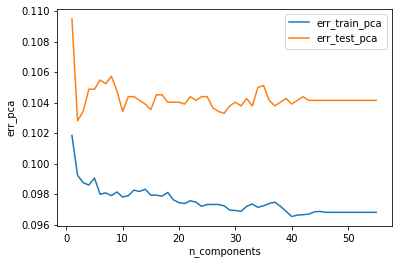

In [64]:
plt.plot(range(1,56), err_train_pca, label='err_train_pca')
plt.plot(range(1,56), err_test_pca, label='err_test_pca')
plt.xlabel('n_components')
plt.ylabel('err_pca')
plt.legend()

Наименьшую ошибку на тестовой выборке дает метод KNN (35 neighbours), примененный к проекциям на двумерное многообразие, полученных методом PCA - 0.10281621752852634
Это значение ошибки меньше, чем при использовании исходных данных в методе KNN (35 neighbours)

Попробуем повторить подбор параметра в методе KNN, используя проекции тренировочных данных на двумерное многообразие

In [65]:
pca = PCA(n_components=2)
principalComponents_train = pca.fit_transform(X_train)
principalComponents_test = pca.fit_transform(X_test)
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(principalComponents_train, np.array(y_train))

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.10139605462822454 55


In [69]:
nnb = [55, 65, 75]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(principalComponents_train, np.array(y_train))

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.10139605462822454 55


In [67]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(principalComponents_train, np.array(y_train))

err_train = np.mean(y_train != knn.predict(principalComponents_train))
err_test  = np.mean(y_test  != knn.predict(principalComponents_test))

print(err_train, err_test)

0.09996965098634294 0.10330177227482398


Стало хуже